In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [69]:
df = pd.read_csv("/content/Employee.csv")



In [70]:
# 1. Data Exploration: (Score : 2)
# Explore the data, list down the unique values in each feature and find its length.
# Perform the statistical analysis and renaming of the columns.
for col in df.columns:
    print(f"Column: {col}")
    print("Unique Values:", df[col].unique())
    print("Count:", len(df[col].unique()))
    print("")


Column: Company
Unique Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Count: 7

Column: Age
Unique Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Count: 30

Column: Salary
Unique Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Count: 41

Column: Place
Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Count: 12

Column: Country
Unique Values: ['India']
Count: 1

Column: Gender
Unique Values: [0 1]
Count: 2



In [71]:
df.describe(include="all")


,Company,Age,Salary,Place,Country,Gender
count,140,130.000000,124.000000,134,148,148.000000
unique,6,NaN,NaN,11,1,NaN
top,TCS,NaN,NaN,Mumbai,India,NaN
freq,53,NaN,NaN,37,148,NaN
mean,NaN,30.484615,5312.467742,NaN,NaN,0.222973
std,NaN,11.096640,2573.764683,NaN,NaN,0.417654
min,NaN,0.000000,1089.000000,NaN,NaN,0.000000
25%,NaN,22.000000,3030.000000,NaN,NaN,0.000000
50%,NaN,32.500000,5000.000000,NaN,NaN,0.000000
75%,NaN,37.750000,8000.000000,NaN,NaN,0.000000


In [72]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head()


,company,age,salary,place,country,gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [73]:
# 2. Data Cleaning: (Score : 2)
# ● Find the missing and inappropriate values, treat them appropriately.

print("Missing values are:")
df.isnull().sum()


Missing values are:


,0
company,8
age,18
salary,24
place,14
country,0
gender,0


In [60]:
#Handling Missing Values:
df['salary'] = df['salary'].fillna(df['salary'].median())
df['Place'] = df['Place'].fillna(df['Place'].mode()[0])
df['gender'] = df['gender'].fillna(df['gender']).mode()[0]

In [61]:
# ● Remove all duplicate rows.
df.drop_duplicates(inplace=True)


In [62]:
# ● Replace the value 0 in age as NaN Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode) .
df['age'] = df['age'].replace(0, np.nan)
df['age'] = df['age'].fillna(df['age'].median())

In [43]:
# ● Find the outliers.
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

lower_age = Q1_age - 1.5 * IQR_age
upper_age = Q3_age + 1.5 * IQR_age

age_outliers = df[(df['age'] < lower_age) | (df['age'] > upper_age)]
print("age OUTLIERS:")
print("Age outliers count",len(age_outliers))

Q1_sal = df['salary'].quantile(0.25)
Q3_sal = df['salary'].quantile(0.75)
IQR_sal = Q3_sal - Q1_sal

lower_sal = Q1_sal - 1.5 * IQR_sal
upper_sal = Q3_sal + 1.5 * IQR_sal

salary_outliers = df[(df['salary'] < lower_sal) | (df['salary'] > upper_sal)]
print("\nsalary OUTLIERS:")
print("Salary outliers count",len(salary_outliers))


age OUTLIERS:
Age outliers count 0

salary OUTLIERS:
Salary outliers count 0


In [63]:
# 3.Data Analysis: (Score : 2)
# Filter the data with age >40 and salary<5000 Plot the chart with age and salary Count the number of people from each place and represent it visually
age_data = df[(df['age'] > 40) & (df['salary'] < 5000)]
age_data


,company,age,salary,place,country,gender
21,Infosys,50.0,3184.0,Mumbai,India,0
32,Infosys,45.0,4034.0,Mumbai,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
57,Infosys,51.0,3184.0,Mumbai,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Mumbai,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Mumbai,India,0
122,Infosys,44.0,3234.0,Mumbai,India,0
138,CTS,44.0,3033.0,Mumbai,India,0


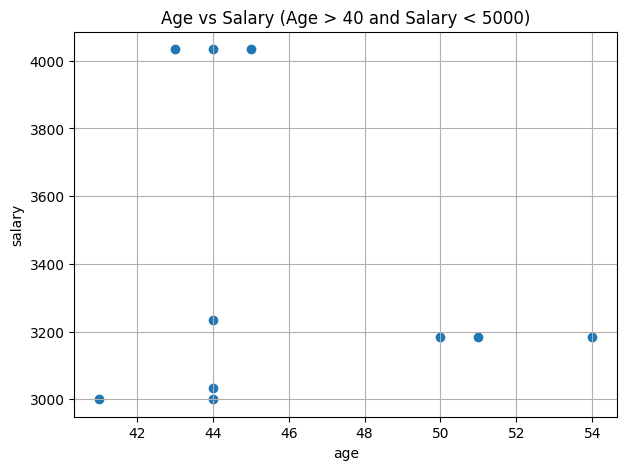

In [64]:
plt.figure(figsize=(7,5))
plt.scatter(age_data['age'], age_data['salary'])
plt.xlabel("age")
plt.ylabel("salary")
plt.title("Age vs Salary (Age > 40 and Salary < 5000)")
plt.grid(True)
plt.show()

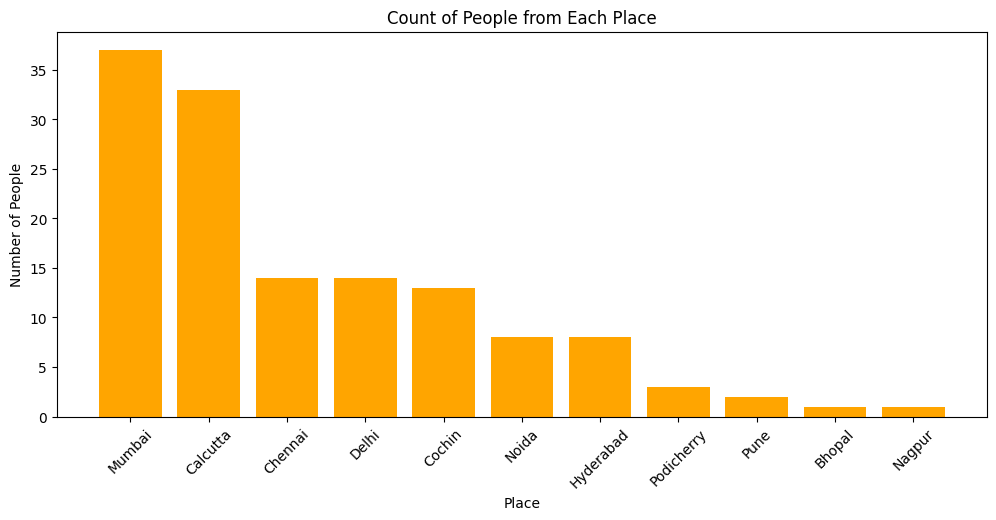

In [74]:
place_counts = df['place'].value_counts()

plt.figure(figsize=(12,5))
plt.bar(place_counts.index, place_counts.values, color='orange')
plt.xlabel("Place")
plt.ylabel("Number of People")
plt.title("Count of People from Each Place")
plt.xticks(rotation=45)
plt.show()

In [79]:
# Data Encoding: (Score : 2)
# Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Company_LE'] = le.fit_transform(df['company'])
df['Place_LE']   = le.fit_transform(df['place'])
df['Country_LE'] = le.fit_transform(df['country'])
df['Gender_LE']  = le.fit_transform(df['gender'])
print("Label Encoding Completed")
print(df[['company', 'Company_LE', 'place', 'Place_LE']].head())


Label Encoding Completed
   company  Company_LE     place  Place_LE
0      TCS           4   Chennai         2
1  Infosys           2    Mumbai         6
2      TCS           4  Calcutta         1
3  Infosys           2     Delhi         4
4      TCS           4    Mumbai         6


In [81]:
df_onehot = pd.get_dummies(df, columns=['company', 'place', 'country', 'gender'], drop_first=True)

print("OneHot Encoding ")
print(df_onehot.head())


One-Hot Encoding Completed
    age  salary  Company_LE  Place_LE  Country_LE  Gender_LE  \
0  20.0     NaN           4         2           0          0   
1  30.0     NaN           2         6           0          0   
2  35.0  2300.0           4         1           0          0   
3  40.0  3000.0           2         4           0          0   
4  23.0  4000.0           4         6           0          0   

   company_Congnizant  company_Infosys  company_Infosys Pvt Lmt  company_TCS  \
0               False            False                    False         True   
1               False             True                    False        False   
2               False            False                    False         True   
3               False             True                    False        False   
4               False            False                    False         True   

   ...  place_Chennai  place_Cochin  place_Delhi  place_Hyderabad  \
0  ...           True         False  

In [82]:
# Feature Scaling: (Score : 2)
# ● After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
standard_scaler = StandardScaler()

numeric_cols = ['age', 'salary', 'Company_LE', 'Place_LE', 'Country_LE', 'Gender_LE']

df_standard_scaled = df.copy()
df_standard_scaled[numeric_cols] = standard_scaler.fit_transform(df[numeric_cols])

print("Standard Scaling Completed")
print(df_standard_scaled[numeric_cols].head())

Standard Scaling Completed
        age    salary  Company_LE  Place_LE  Country_LE  Gender_LE
0 -0.948501       NaN    0.848436 -0.852542         0.0  -0.535683
1 -0.043841       NaN   -0.272712  0.428435         0.0  -0.535683
2  0.408489 -1.175200    0.848436 -1.172787         0.0  -0.535683
3  0.860819 -0.902122   -0.272712 -0.212054         0.0  -0.535683
4 -0.677103 -0.512010    0.848436  0.428435         0.0  -0.535683


In [83]:
minmax_scaler = MinMaxScaler()

df_minmax_scaled = df.copy()
df_minmax_scaled[numeric_cols] = minmax_scaler.fit_transform(df[numeric_cols])

print("\nMin-Max Scaling Completed")
print(df_minmax_scaled[numeric_cols].head())



Min-Max Scaling Completed
        age    salary  Company_LE  Place_LE  Country_LE  Gender_LE
0  0.370370       NaN    0.666667  0.181818         0.0        0.0
1  0.555556       NaN    0.333333  0.545455         0.0        0.0
2  0.648148  0.137817    0.666667  0.090909         0.0        0.0
3  0.740741  0.217480    0.333333  0.363636         0.0        0.0
4  0.425926  0.331285    0.666667  0.545455         0.0        0.0
